<a href="https://colab.research.google.com/github/sowmen/Deepfake-Challenge-Kaggle/blob/master/Logistic_Network_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import os, sys, time
import math
import random
import cv2
from tqdm import tqdm_notebook as tqdm
import pickle 

%matplotlib inline
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/dataset_0_22.csv')
df2 = pd.read_csv('/content/drive/My Drive/dataset_23_40.csv')

In [4]:
df1

,filename,label,split,original,video_path
0,owxbbpjpch.mp4,1,train,wynotylpnm.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/owxbbpjpch.mp4
1,vpmyeepbep.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/vpmyeepbep.mp4
2,fzvpbrzssi.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/fzvpbrzssi.mp4
3,htorvhbcae.mp4,1,train,wclvkepakb.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/htorvhbcae.mp4
4,fckxaqjbxk.mp4,1,train,vpmyeepbep.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/fckxaqjbxk.mp4
...,...,...,...,...,...
52627,ltyxbyibfh.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_22/ltyxbyibfh.mp4
52628,oxmhtrdqvf.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_22/oxmhtrdqvf.mp4
52629,hkdmxpmewr.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_22/hkdmxpmewr.mp4
52630,kmrjhsbqqy.mp4,1,train,fgrxodoqcr.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_22/kmrjhsbqqy.mp4


In [5]:
df2

,filename,label,split,original,video_path
0,ptfpxubayi.mp4,1,train,xqpxxtnryn.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_23/ptfpxubayi.mp4
1,uvqiaycegp.mp4,1,train,ooswfaxrxx.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_23/uvqiaycegp.mp4
2,wjgieovyyg.mp4,1,train,roricbxvev.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_23/wjgieovyyg.mp4
3,blpftgoedo.mp4,1,train,qtlidomjgs.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_23/blpftgoedo.mp4
4,twjcgqwjua.mp4,1,train,przmougwsm.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_23/twjcgqwjua.mp4
...,...,...,...,...,...
44141,jfihvhrjyr.mp4,1,train,qllhpepyum.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/jfihvhrjyr.mp4
44142,xgqerzezcm.mp4,0,train,NaN,/content/drive/My Drive/Dataset2/dfdc_train_part_40/xgqerzezcm.mp4
44143,hsxhkffniw.mp4,1,train,cxvctggwxi.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/hsxhkffniw.mp4
44144,bqyybmnxmk.mp4,1,train,zukdhmubyy.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/bqyybmnxmk.mp4


In [6]:
train_df = pd.concat([df1, df2], ignore_index=True)
train_df

,filename,label,split,original,video_path
0,owxbbpjpch.mp4,1,train,wynotylpnm.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/owxbbpjpch.mp4
1,vpmyeepbep.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/vpmyeepbep.mp4
2,fzvpbrzssi.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/fzvpbrzssi.mp4
3,htorvhbcae.mp4,1,train,wclvkepakb.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/htorvhbcae.mp4
4,fckxaqjbxk.mp4,1,train,vpmyeepbep.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/fckxaqjbxk.mp4
...,...,...,...,...,...
96773,jfihvhrjyr.mp4,1,train,qllhpepyum.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/jfihvhrjyr.mp4
96774,xgqerzezcm.mp4,0,train,NaN,/content/drive/My Drive/Dataset2/dfdc_train_part_40/xgqerzezcm.mp4
96775,hsxhkffniw.mp4,1,train,cxvctggwxi.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/hsxhkffniw.mp4
96776,bqyybmnxmk.mp4,1,train,zukdhmubyy.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/bqyybmnxmk.mp4


,filename,split,original,video_path
label,,,,
0,15281,15281,0,15281
1,81497,81497,81497,81497


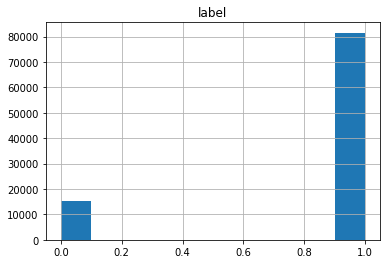

In [7]:
train_df.hist(column="label")
train_df.groupby('label').count()

In [9]:
s0 = train_df.label[train_df.label.eq(0)].sample(25).index
s1 = train_df.label[train_df.label.eq(1)].sample(75).index 
sample_df = train_df.loc[s0.union(s1)]
sample_df

,filename,label,split,original,video_path
169,fuiglusbnl.mp4,1,train,rktrpsdlci.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/fuiglusbnl.mp4
938,bqefygjsnx.mp4,1,train,ybbrkacebd.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/bqefygjsnx.mp4
1119,jxqibxwhlc.mp4,1,train,fsaronfupy.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/jxqibxwhlc.mp4
2434,skrwnpzxfz.mp4,1,train,nfimdsszyf.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_1/skrwnpzxfz.mp4
2707,cqvmcswepa.mp4,1,train,cnpanmywno.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_1/cqvmcswepa.mp4
...,...,...,...,...,...
92844,jtjejchhfw.mp4,1,train,rzbgmwtzcx.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_39/jtjejchhfw.mp4
93872,ughzjpnyss.mp4,1,train,npzidjrmup.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_39/ughzjpnyss.mp4
94157,ubhxbrmrhk.mp4,1,train,mrbvjsgjcw.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_39/ubhxbrmrhk.mp4
96091,qdiufdxior.mp4,1,train,axlsscylar.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/qdiufdxior.mp4


In [0]:
sample_df = pd.read_csv('/content/drive/My Drive/sample_df_100.csv')

,filename,split,original,video_path
label,,,,
0,25,25,0,25
1,75,75,75,75


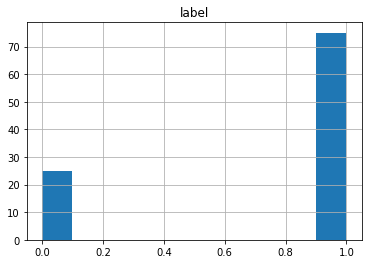

In [10]:
sample_df.hist(column="label")
sample_df.groupby('label').count()

In [11]:
real_dir = [f for f in sample_df.video_path if sample_df.loc[sample_df.video_path == f].label.item() == 0]
fake_dir = [f for f in sample_df.video_path if sample_df.loc[sample_df.video_path == f].label.item() == 1]
print(real_dir[0:5])
print(fake_dir[0:5])

['/content/drive/My Drive/Dataset/dfdc_train_part_2/pdswwyyntw.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_3/pxrhjlzird.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_5/rlzaurucfj.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_8/gexfmyynda.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_10/qyulpzekti.mp4']
['/content/drive/My Drive/Dataset/dfdc_train_part_0/fuiglusbnl.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_0/bqefygjsnx.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_0/jxqibxwhlc.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_1/skrwnpzxfz.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_1/cqvmcswepa.mp4']


# **Frame Seperation**

In [0]:
input_size = 224
frames_per_video = 20

In [0]:
def _read_frames_at_indices(path, capture, frame_idxs):
    try:
        frames = []
        idxs_read = []
        for frame_idx in range(frame_idxs[0], frame_idxs[-1] + 1):
            # Get the next frame, but don't decode if we're not using it.
            ret = capture.grab()
            if not ret:
                print("Error grabbing frame %d from movie %s" % (frame_idx, path.split('/',4)[-1]))
                break

            # Need to look at this frame?
            current = len(idxs_read)
            if frame_idx == frame_idxs[current]:
                ret, frame = capture.retrieve()
                if not ret or frame is None:
                    print("Error retrieving frame %d from movie %s" % (frame_idx, path.split('/',4)[-1]))
                    break

                frame = _postprocess_frame(frame)
                frames.append(frame)
                idxs_read.append(frame_idx)

        if len(frames) > 0:
            return frames
        print("No frames read from movie %s" % path)
        return None
    except:
        print("Exception while reading movie %s" % path.split('/',4)[-1])
        return None 

def _postprocess_frame(frame, insets=(0,0)):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    if insets[0] > 0:
        W = frame.shape[1]
        p = int(W * insets[0])
        frame = frame[:, p:-p, :]

    if insets[1] > 0:
        H = frame.shape[1]
        q = int(H * insets[1])
        frame = frame[q:-q, :, :]

    return frame 

In [0]:
def read_frames(path, num_frames=frames_per_video, jitter=0, seed=None):
    """Reads frames that are always evenly spaced throughout the video.

        Arguments:
            path: the video file
            num_frames: how many frames to read, -1 means the entire video
                (warning: this will take up a lot of memory!)
            jitter: if not 0, adds small random offsets to the frame indices;
                this is useful so we don't always land on even or odd frames
            seed: random seed for jittering; if you set this to a fixed value,
                you probably want to set it only on the first video 
    """
    assert num_frames > 0

    capture = cv2.VideoCapture(path)
    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count <= 0: return None

    frame_idxs = np.linspace(0, frame_count - 1, num_frames, endpoint=True, dtype=np.int)
    if jitter > 0:
        np.random.seed(seed)
        jitter_offsets = np.random.randint(-jitter, jitter, len(frame_idxs))
        frame_idxs = np.clip(frame_idxs + jitter_offsets, 0, frame_count - 1)

    result = _read_frames_at_indices(path, capture, frame_idxs)
    capture.release()
    return result

In [0]:
def isotropically_resize_image(img, size, resample=cv2.INTER_AREA):
    h, w = img.shape[:2]
    if w > h:
        h = h * size // w
        w = size
    else:
        w = w * size // h
        h = size

    resized = cv2.resize(img, (w, h), interpolation=resample)
    return resized


def make_square_image(img):
    h, w = img.shape[:2]
    size = max(h, w)
    t = 0
    b = size - h
    l = 0
    r = size - w
    return cv2.copyMakeBorder(img, t, b, l, r, cv2.BORDER_CONSTANT, value=0)

In [0]:
sys.path.insert(1,'/content/drive/My Drive/YoloV2' )
import yolov2

In [17]:
mobilenetv2 = yolov2.load_mobilenetv2_224_075_detector("/content/drive/My Drive/YoloV2/facedetection-mobilenetv2-size224-alpha0.75.h5")
yolo_model = yolov2.FaceDetector(model=mobilenetv2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
def get_faces(frames):
    faces = []
    for face in frames:
        yolo_boxes = yolo_model.detect(face, 0.7)
        yb = yolov2.get_boxes_points(yolo_boxes, face.shape)
        
        for b in yb:
            lx, ly, rx, ry = b
            # x, y, w, h here
            # ax.add_patch(Rectangle((lx,ly),rx - lx,ry - ly,linewidth=2,edgecolor='red',facecolor='none'))
            img_crop = face[ly:ry, lx:rx]
            resized_face = isotropically_resize_image(img_crop, input_size)
            resized_face = make_square_image(resized_face)
            faces.append(resized_face)
    return faces

# Array Initialization

In [19]:
for path in tqdm(real_dir):
    if(os.path.exists(path) == 0):
        print(path)

In [20]:
for path in tqdm(fake_dir):
    if(os.path.exists(path) == 0):
        print(path)

In [0]:
x_orig = []
y_orig = []
X_test = []
Y_test = []

In [23]:
for path in tqdm(real_dir):
    frames = read_frames(path)
    faces = get_faces(frames)
    X_test.extend(faces)
    Y_test.extend([0] * len(faces))

In [24]:
for path in tqdm(fake_dir):
    frames = read_frames(path)
    if(len(frames) == 0):
        print(path)
    faces = get_faces(frames)
    X_test.extend(faces)
    Y_test.extend([1] * len(faces))

In [0]:
# Save list to pickle
with open('x_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(Y_test,f )

In [0]:
with open('/content/drive/My Drive/x_orig.pkl', 'rb') as f:
    x_orig = pickle.load(f)

with open('/content/drive/My Drive/y_orig.pkl', 'rb') as f:
    y_orig = pickle.load(f)

In [29]:
temp = list(zip(X_test, Y_test))
random.shuffle(temp)

X_test, Y_test = zip(*temp)
del(temp)
gc.collect()

0

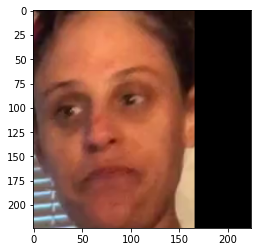

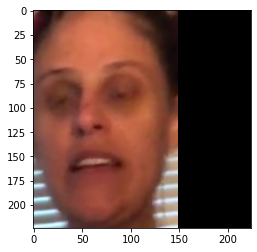

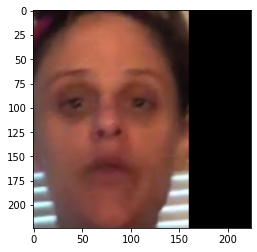

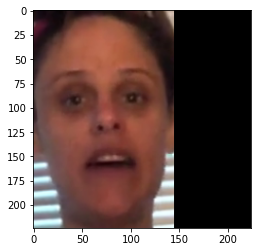

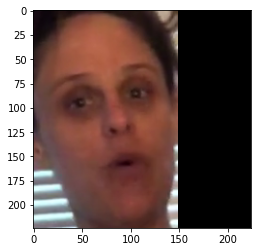

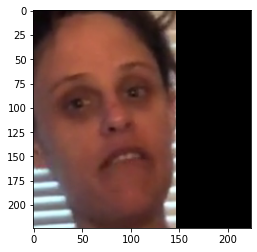

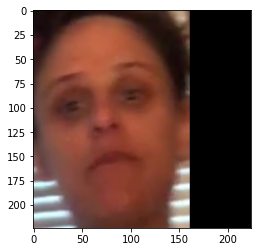

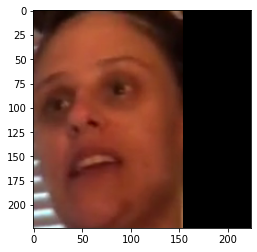

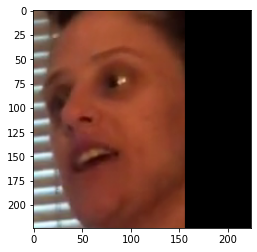

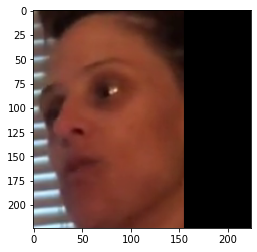

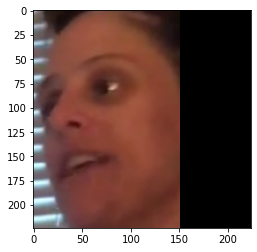

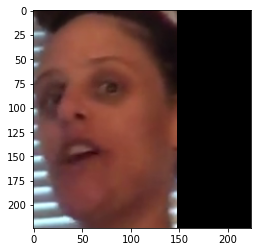

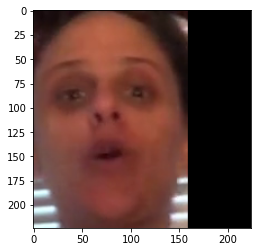

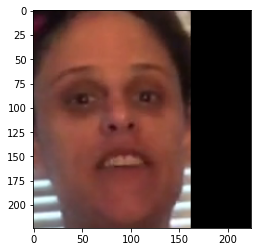

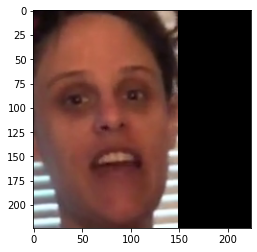

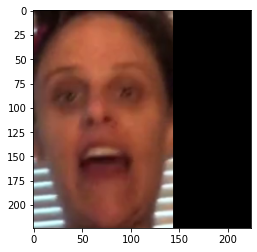

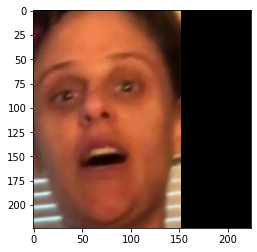

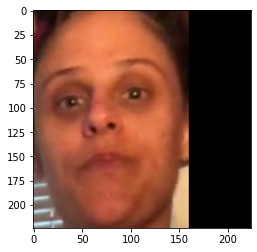

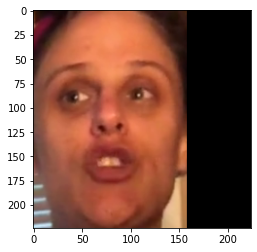

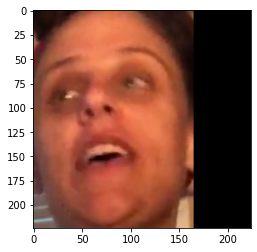

In [0]:
for f in faces:
    plt.figure()
    plt.imshow(f)
    plt.plot()

In [9]:
print(len(x_orig), len(y_orig))
print(x_orig[0].shape)

4298 4298
(224, 224, 3)


In [0]:
x_np = np.array(x_orig)
y_np = np.array(y_orig)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [32]:
print(x_np.shape)
print(y_np.shape)
print(X_test.shape)
print(Y_test.shape)

(4298, 224, 224, 3)
(4298,)
(2135, 224, 224, 3)
(2135,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_np, y_np, test_size=0.20, random_state=4)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)

Shape of X_train: (3438, 224, 224, 3)
Shape of X_val: (860, 224, 224, 3)
Shape of Y_train: (3438,)
Shape of Y_val: (860,)


In [0]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# **Manual Logistic Network**

### Model Definitions

In [0]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
          
    return parameters

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(l)], "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))     
    return AL, caches

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = np.sum(np.log(AL)*Y + (1-Y)*np.log(1-AL)) / m    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    return cost

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

### Training

In [0]:
layers_dims = [X_train_flatten.shape[0], 50, 25, 16, 8, 1] 

In [0]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0005, num_iterations = 5000, print_cost=True):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [0]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    predictions, caches = L_model_forward(X, parameters)
    # predictions = []
    # for x in AL[0]:
    #     if(x <= 0.5):
    #         predictions.append(0)
    #     else:
    #         predictions.append(1)
    
    return np.array(predictions).reshape(AL.shape[0],AL.shape[1])

In [0]:
parameters = L_layer_model(X_train_flatten, Y_train, layers_dims)

Cost after iteration 1600: -0.692940
Cost after iteration 1700: -0.692929
Cost after iteration 1800: -0.692919
Cost after iteration 1900: -0.692909
Cost after iteration 2000: -0.692899
Cost after iteration 2100: -0.692890
Cost after iteration 2200: -0.692881
Cost after iteration 2300: -0.692872
Cost after iteration 2400: -0.692863
Cost after iteration 2500: -0.692854
Cost after iteration 2600: -0.692846
Cost after iteration 2700: -0.692838
Cost after iteration 2800: -0.692830
Cost after iteration 2900: -0.692822
Cost after iteration 3000: -0.692815
Cost after iteration 3100: -0.692808
Cost after iteration 3200: -0.692800
Cost after iteration 3300: -0.692793
Cost after iteration 3400: -0.692787
Cost after iteration 3500: -0.692780
Cost after iteration 3600: -0.692773
Cost after iteration 3700: -0.692767


In [0]:
predictions_train = predict(X_train_flatten, parameters)

In [0]:
predictions_test = predict(X_val_flatten, parameters)

In [0]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - Y_val)) * 100))

# **Keras Network**

In [0]:
import tensorflow.keras as keras
import tensorflow as tf

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=150, validation_data=(X_val, Y_val))

Train on 3438 samples, validate on 860 samples
Epoch 1/150
3438/3438 [==============================] - 4s 1ms/sample - loss: 0.6893 - accuracy: 0.5448 - val_loss: 0.6827 - val_accuracy: 0.5163
Epoch 2/150
3438/3438 [==============================] - 3s 992us/sample - loss: 0.6830 - accuracy: 0.5663 - val_loss: 0.6683 - val_accuracy: 0.5837
Epoch 3/150
3438/3438 [==============================] - 3s 994us/sample - loss: 0.6739 - accuracy: 0.5899 - val_loss: 0.6525 - val_accuracy: 0.6128
Epoch 4/150
3438/3438 [==============================] - 3s 993us/sample - loss: 0.6604 - accuracy: 0.6059 - val_loss: 0.6400 - val_accuracy: 0.6221
Epoch 5/150
3438/3438 [==============================] - 3s 988us/sample - loss: 0.6454 - accuracy: 0.6210 - val_loss: 0.8106 - val_accuracy: 0.5174
Epoch 6/150
3438/3438 [==============================] - 3s 994us/sample - loss: 0.6296 - accuracy: 0.6309 - val_loss: 0.6222 - val_accuracy: 0.6500
Epoch 7/150
3438/3438 [==============================] - 3s 9

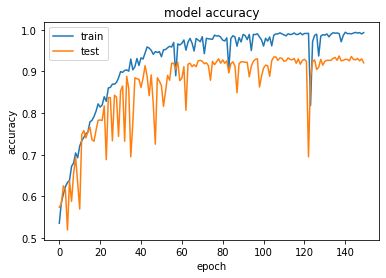

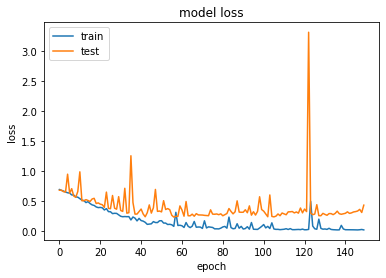

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

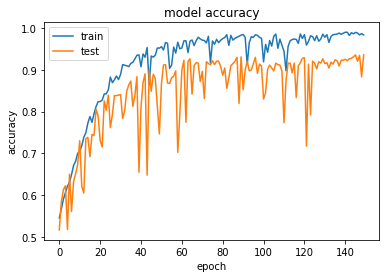

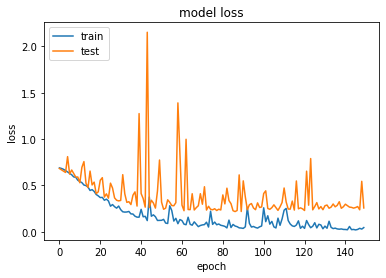

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
results = model.evaluate(X_test, Y_test, batch_size=32)

In [49]:
results

[3.099280230278712, 0.54238874]

In [50]:
model.metrics_names

['loss', 'accuracy']